In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import calendar

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import extract
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

#Database setup
engine = create_engine("sqlite:///hawaii.sqlite")


In [5]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = []
results = session.query(Measurement.date, Measurement.prcp)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()
print(df.to_string(index=False))

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [12]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


<Figure size 432x288 with 0 Axes>

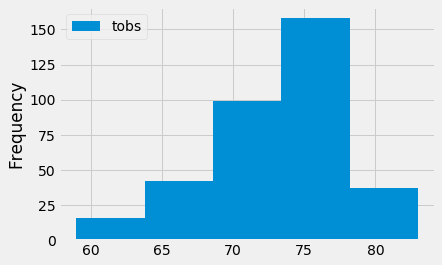

In [41]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
print(df)

plt.tight_layout()
df.plot.hist(bins=5)

# Challenge

In [16]:
#query for all june dates throughout years 
session.query(Measurement.date).filter(extract('month', Measurement.date)==6).all()

[('2010-06-01'),
 ('2010-06-02'),
 ('2010-06-03'),
 ('2010-06-04'),
 ('2010-06-05'),
 ('2010-06-06'),
 ('2010-06-07'),
 ('2010-06-08'),
 ('2010-06-09'),
 ('2010-06-10'),
 ('2010-06-11'),
 ('2010-06-12'),
 ('2010-06-13'),
 ('2010-06-14'),
 ('2010-06-15'),
 ('2010-06-16'),
 ('2010-06-17'),
 ('2010-06-18'),
 ('2010-06-19'),
 ('2010-06-20'),
 ('2010-06-21'),
 ('2010-06-22'),
 ('2010-06-23'),
 ('2010-06-24'),
 ('2010-06-25'),
 ('2010-06-26'),
 ('2010-06-27'),
 ('2010-06-28'),
 ('2010-06-29'),
 ('2010-06-30'),
 ('2011-06-01'),
 ('2011-06-02'),
 ('2011-06-03'),
 ('2011-06-04'),
 ('2011-06-05'),
 ('2011-06-06'),
 ('2011-06-07'),
 ('2011-06-08'),
 ('2011-06-09'),
 ('2011-06-10'),
 ('2011-06-11'),
 ('2011-06-12'),
 ('2011-06-13'),
 ('2011-06-14'),
 ('2011-06-15'),
 ('2011-06-17'),
 ('2011-06-18'),
 ('2011-06-19'),
 ('2011-06-20'),
 ('2011-06-21'),
 ('2011-06-24'),
 ('2011-06-25'),
 ('2011-06-26'),
 ('2011-06-27'),
 ('2011-06-28'),
 ('2011-06-29'),
 ('2012-06-01'),
 ('2012-06-02'),
 ('2012-06-03'

In [38]:
#june precipitatiom data frame 
results = []
results = session.query(Measurement.date, Measurement.prcp)
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()


june_precip_df = pd.DataFrame(results, columns=['date','precipitation'])
june_precip_df = june_precip_df.sort_index()
june_precip_df

,date,precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [45]:
#june temp data throughout the years 
results = []
results = session.query(Measurement.date, Measurement.tobs)
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()


june_temps_df = pd.DataFrame(results, columns=['date','tobs'])
june_temps_df = june_temps_df.sort_index()
june_temps_df

,date,tobs
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


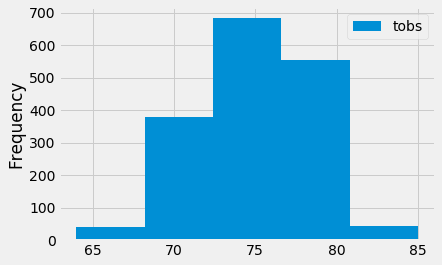

In [44]:
june_temps_df.plot.hist(bins=5)

In [48]:
june_temps_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [22]:
#query for all december dates throughout years 
session.query(Measurement.date).filter(extract('month', Measurement.date)==12).all()

[('2010-12-01'),
 ('2010-12-03'),
 ('2010-12-04'),
 ('2010-12-06'),
 ('2010-12-07'),
 ('2010-12-08'),
 ('2010-12-09'),
 ('2010-12-10'),
 ('2010-12-11'),
 ('2010-12-12'),
 ('2010-12-13'),
 ('2010-12-14'),
 ('2010-12-15'),
 ('2010-12-16'),
 ('2010-12-17'),
 ('2010-12-18'),
 ('2010-12-19'),
 ('2010-12-23'),
 ('2010-12-24'),
 ('2010-12-26'),
 ('2010-12-27'),
 ('2010-12-28'),
 ('2010-12-29'),
 ('2010-12-30'),
 ('2010-12-31'),
 ('2011-12-01'),
 ('2011-12-02'),
 ('2011-12-03'),
 ('2011-12-04'),
 ('2011-12-05'),
 ('2011-12-06'),
 ('2011-12-07'),
 ('2011-12-08'),
 ('2011-12-09'),
 ('2011-12-10'),
 ('2011-12-11'),
 ('2011-12-12'),
 ('2011-12-13'),
 ('2011-12-14'),
 ('2011-12-15'),
 ('2011-12-16'),
 ('2011-12-17'),
 ('2011-12-18'),
 ('2011-12-19'),
 ('2011-12-20'),
 ('2011-12-21'),
 ('2011-12-22'),
 ('2011-12-23'),
 ('2011-12-24'),
 ('2011-12-25'),
 ('2011-12-26'),
 ('2011-12-27'),
 ('2011-12-28'),
 ('2011-12-29'),
 ('2011-12-30'),
 ('2011-12-31'),
 ('2012-12-01'),
 ('2012-12-02'),
 ('2012-12-03'

In [39]:
#december precipitatiom data frame 
results = []
results = session.query(Measurement.date, Measurement.prcp)
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()


dec_precip_df = pd.DataFrame(results, columns=['date','precipitation'])
dec_precip_df

,date,precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [47]:
#december temps data frame 
results = []
results = session.query(Measurement.date, Measurement.tobs)
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()


dec_temps_df = pd.DataFrame(results, columns=['date','tobs'])
dec_temps_df

,date,tobs
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


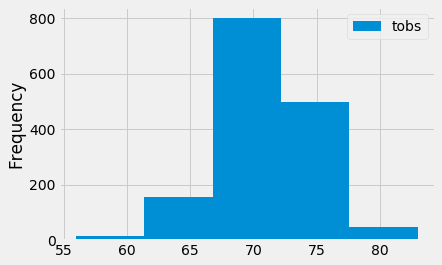

In [46]:
dec_temps_df.plot.hist(bins=5)

In [49]:
dec_temps_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
